In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.shape, y_train.shape) # (60000, 28, 28, 1) (60000,)

(60000, 28, 28, 1) (60000,)


In [12]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
batch_size = 128
epochs = 10
classifier = Sequential([
    Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.25),
    # Dense(256, activation='relu'),
    # Dropout(0.5),
    Dense(units = num_classes, activation='softmax')
])




In [14]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [15]:
#callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, verbose=1, patience=4)

mc = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [7]:
hist = classifier.fit(x_train, y_train,epochs=5,verbose=1,validation_split=0.3,callbacks=cb)
# print("The model has successfully trained")
# classifier.save('my_model_11.h5')
# print("Saving the model as my_model_11.h5")

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9344
Epoch 1: val_accuracy improved from -inf to 0.97639, saving model to .\best_model.h5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.2132 - accuracy: 0.9344 - val_loss: 0.0776 - val_accuracy: 0.9764
Epoch 2/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9776
Epoch 2: val_accuracy improved from 0.97639 to 0.98183, saving model to .\best_model.h5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0593 - val_accuracy: 0.9818
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0533 - accuracy: 0.9833
Epoch 3: val_accuracy improved from 0.98183 to 0.98556, saving model to .\best_model.h5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0469 - val_accuracy: 0.9856
Epoch 4/5
1309/1313 [======================

In [63]:
model = keras.models.load_model('./best_model.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033588018268346786
Test accuracy: 0.9886999726295471


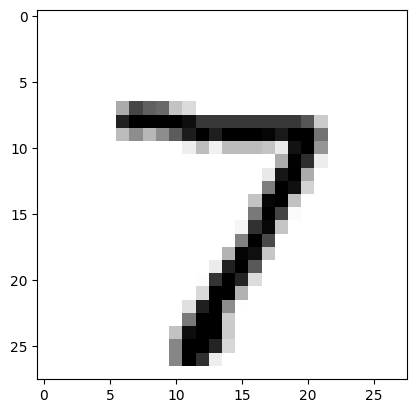

In [64]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(input_shape), cmap=plt.cm.binary)
plt.show()

In [65]:
import pandas as pd
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
pd.DataFrame(predictions)

313/313 [==============================] - 2s 5ms/step


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_284\2037829608.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


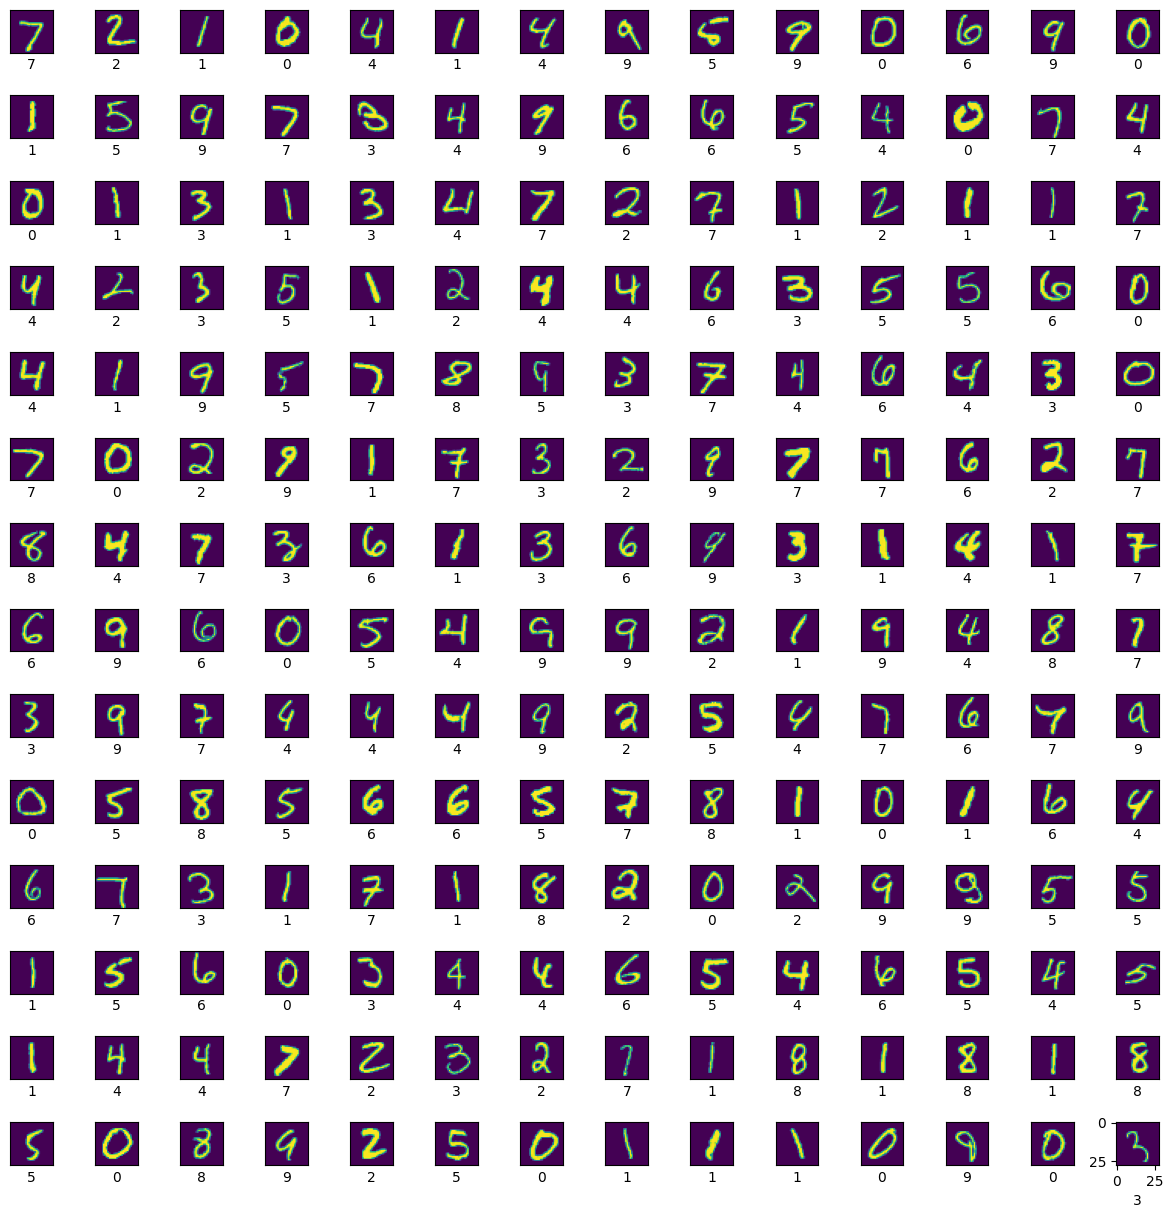

In [66]:
import math
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape(input_shape))
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [71]:
print(predictions)
print(y_test)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
y_pred = [np.argmax(labels) for labels in y_test]

In [75]:
print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd

In [80]:
confusion_matrix(y_pred, predictions)

array([[ 975,    0,    0,    0,    1,    0,    1,    1,    2,    0],
       [   0, 1132,    1,    0,    0,    1,    0,    1,    0,    0],
       [   0,    0, 1021,    0,    2,    0,    1,    8,    0,    0],
       [   0,    0,    2,  998,    0,    3,    0,    6,    1,    0],
       [   0,    0,    0,    0,  976,    0,    1,    1,    1,    3],
       [   1,    0,    0,    6,    0,  880,    1,    1,    1,    2],
       [   5,    3,    0,    0,    2,    3,  943,    0,    2,    0],
       [   0,    2,    5,    2,    0,    0,    0, 1018,    1,    0],
       [   3,    1,    2,    0,    1,    2,    2,    3,  954,    6],
       [   0,    3,    1,    0,    3,    5,    0,    6,    1,  990]],
      dtype=int64)

<Axes: >

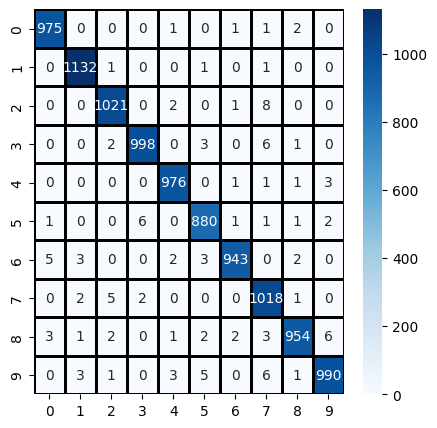

In [81]:
numbers = [i for i in range(10)]
cm = confusion_matrix(y_pred, predictions)
cm_df_alpha = pd.DataFrame(cm, index=numbers, columns=numbers)
plt.figure(figsize = (5,5))
sns.heatmap(cm_df_alpha,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [83]:
accuracy = accuracy_score(predictions, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9887
